In [1136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pybaseball as pyb
import matplotlib as mpl

In [1137]:
# Define font properties for general text
font_properties = {'family': 'DejaVu Sans', 'size': 12}

# Define font properties for titles
font_properties_titles = {'family': 'DejaVu Sans', 'size': 20}

# Define font properties for axes labels
font_properties_axes = {'family': 'DejaVu Sans', 'size': 16}

# Set the theme for seaborn plots
sns.set_theme(style='whitegrid', 
              palette='deep', 
              font='DejaVu Sans', 
              font_scale=1.5, 
              color_codes=True, 
              rc=None)

# Import matplotlib


# Set the resolution of the figures to 300 DPI
mpl.rcParams['figure.dpi'] = 300

In [1138]:
def df_processing(df_pyb: pd.DataFrame):
    df = df_pyb.copy()
    # Define the codes for different types of swings and whiffs
    swing_code = ['foul_bunt','foul','hit_into_play','swinging_strike', 'foul_tip',
                'swinging_strike_blocked','missed_bunt','bunt_foul_tip']
    whiff_code = ['swinging_strike', 'foul_tip', 'swinging_strike_blocked']

    # Create new columns in the DataFrame to indicate swing, whiff, in-zone, out-zone, and chase
    df['swing'] = (df['description'].isin(swing_code))
    df['whiff'] = (df['description'].isin(whiff_code))
    df['in_zone'] = (df['zone'] < 10)
    df['out_zone'] = (df['zone'] > 10)
    df['chase'] = (df.in_zone==False) & (df.swing == 1)

    # Convert the pitch type to a categorical variable
    df['pfx_z'] = df['pfx_z'] * 12
    df['pfx_x'] = df['pfx_x'] * 12
    return df

df = df_processing(df_pyb)

In [1139]:
df_statcast_group = pd.read_csv('statcast_2024_grouped.csv')

In [1140]:
import pybaseball as pyb
print(pyb.playerid_lookup('Toglia','Michael'))

  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0    toglia    michael     669911  toglm001  toglimi01          25845   

   mlb_played_first  mlb_played_last  
0            2022.0           2024.0  


In [1141]:
print(pyb.playerid_lookup('Judge','Aaron'))
batter_id = 668804
df_pyb = pyb.statcast_batter('2024-03-28', '2024-10-01', batter_id)
sorted_columns = sorted(df_pyb.columns)
print(sorted_columns)
# df_pyb.head()

  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \
0     judge      aaron     592450  judga001  judgeaa01          15640   

   mlb_played_first  mlb_played_last  
0            2016.0           2024.0  
Gathering Player Data
['age_bat', 'age_bat_legacy', 'age_pit', 'age_pit_legacy', 'api_break_x_arm', 'api_break_x_batter_in', 'api_break_z_with_gravity', 'arm_angle', 'at_bat_number', 'away_score', 'away_team', 'ax', 'ay', 'az', 'babip_value', 'balls', 'bat_score', 'bat_score_diff', 'bat_speed', 'bat_win_exp', 'batter', 'batter_days_since_prev_game', 'batter_days_until_next_game', 'bb_type', 'break_angle_deprecated', 'break_length_deprecated', 'delta_home_win_exp', 'delta_pitcher_run_exp', 'delta_run_exp', 'des', 'description', 'effective_speed', 'estimated_ba_using_speedangle', 'estimated_slg_using_speedangle', 'estimated_woba_using_speedangle', 'events', 'fielder_2', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7', 'fielder_8', 'fielder_9', 'fld_sc

In [1142]:
# pd.read_csv('BatterDataFG.csv')
# df_fangraphs = pd.read_csv('BatterDataFG.csv')
# print(df_fangraphs.head())

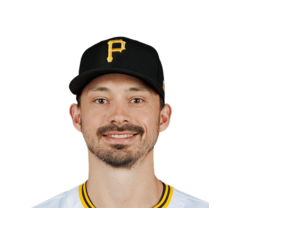

In [1143]:
from PIL import Image
import requests
from io import BytesIO
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Function to get an image from a URL and display it on the given axis
def player_headshot(batter_id: str, ax: plt.Axes):
    # Construct the URL for the player's headshot image
    url = f'https://img.mlbstatic.com/mlb-photos/image/'\
          f'upload/d_people:generic:headshot:67:current.png'\
          f'/w_640,q_auto:best/v1/people/{batter_id}/headshot/silo/current.png'

    # Send a GET request to the URL
    response = requests.get(url)

    # Open the image from the response content
    img = Image.open(BytesIO(response.content))


    # Display the image on the axis
    ax.set_xlim(0, 1.3)
    ax.set_ylim(0, 1)
    ax.imshow(img, extent=[0, 1, 0, 1], origin='upper')

    # Turn off the axis
    ax.axis('off')


# Call the player_headshot function with the pitcher ID and current axis
player_headshot(batter_id=batter_id, ax=plt.subplots(figsize=(1, 1))[1])

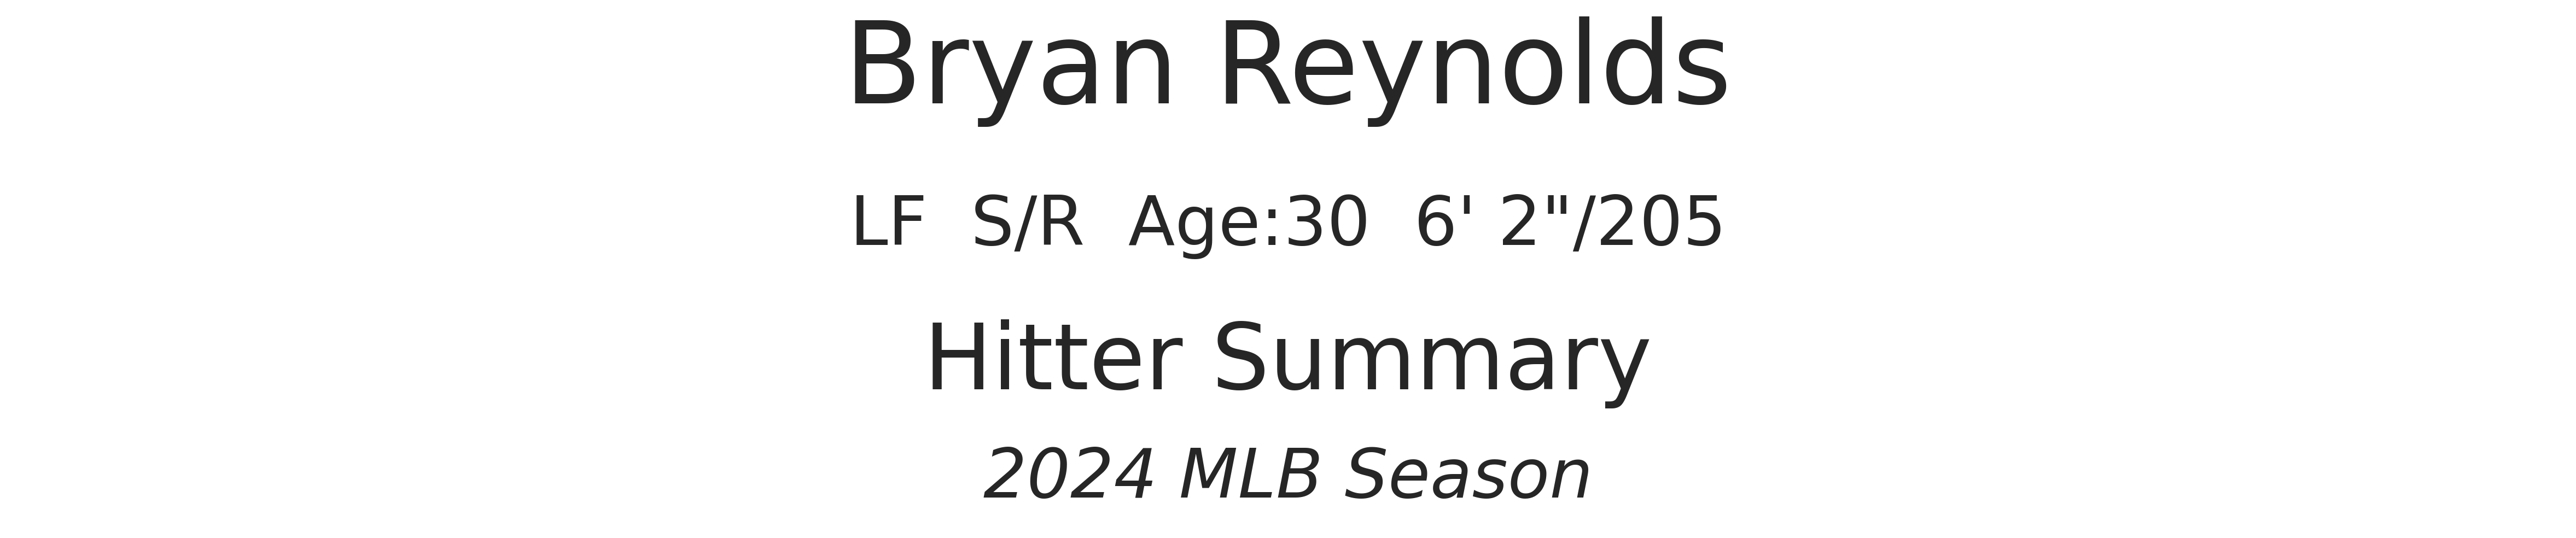

In [1144]:
def player_bio(pitcher_id: str, ax: plt.Axes):
    # Construct the URL to fetch player data
    url = f"https://statsapi.mlb.com/api/v1/people?personIds={pitcher_id}&hydrate=currentTeam"

    # Send a GET request to the URL and parse the JSON response
    data = requests.get(url).json()

    # Extract player information from the JSON data
    player_name = data['people'][0]['fullName']
    batter_throw = data['people'][0]['pitchHand']['code']
    batter_hand = data['people'][0]['batSide']['code']
    position = data['people'][0]['primaryPosition']['abbreviation']
    age = data['people'][0]['currentAge']
    height = data['people'][0]['height']
    weight = data['people'][0]['weight']

    # Display the player's name, handedness, age, height, and weight on the axis
    ax.text(0.5, 1, f'{player_name}', va='top', ha='center', fontsize=50)
    ax.text(0.5, 0.65, f'{position}  {batter_hand}/{batter_throw}  Age:{age}  {height}/{weight}', va='top', ha='center', fontsize=30)
    ax.text(0.5, 0.40, f'Hitter Summary', va='top', ha='center', fontsize=40)
    ax.text(0.5, 0.15, f'2024 MLB Season', va='top', ha='center', fontsize=30, fontstyle='italic')

    # Turn off the axis
    ax.axis('off')

# Call the player_bio function with the pitcher ID and a new axis of size 10x2
player_bio(batter_id, ax=plt.subplots(figsize=(20, 4))[1])

In [1145]:
import requests

def fangraphs_batting_leaderboards(season: int):
    url = f"https://www.fangraphs.com/api/leaders/major-league/data?age=&pos=all&stats=bat&lg=all&season={season}&season1={season}&ind=0&qual=0&type=0&month=0&pageitems=500000"
    response = requests.get(url)
    data = response.json()
    df = pd.DataFrame(data['data'])
    return df

# Example usage:
df_fangraphs = fangraphs_batting_leaderboards(season=2024)
print(df_fangraphs.head())

  Bats  xMLBAMID                                               Name  \
0    R    592450  <a href="statss.aspx?playerid=15640&position=O...   
1    R    677951  <a href="statss.aspx?playerid=25764&position=S...   
2    L    660271  <a href="statss.aspx?playerid=19755&position=D...   
3    L    665742  <a href="statss.aspx?playerid=20123&position=O...   
4    L    683002  <a href="statss.aspx?playerid=26289&position=3...   

                                                Team  Season   Age     AgeR  \
0  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  32.0  32 - 32   
1  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  24.0  24 - 24   
2  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  29.0  29 - 29   
3  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  25.0  25 - 25   
4  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  23.0  23 - 23   

   SeasonMin  SeasonMax      G  ...     TG    TPA   PlayerNameRoute  \
0       2024       2024  15

In [1146]:
import pandas as pd

# List of MLB teams and their corresponding ESPN logo URLs
mlb_teams = [
    {"team": "AZ", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/ari.png&h=500&w=500"},
    {"team": "ATL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/atl.png&h=500&w=500"},
    {"team": "BAL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/bal.png&h=500&w=500"},
    {"team": "BOS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/bos.png&h=500&w=500"},
    {"team": "CHC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/chc.png&h=500&w=500"},
    {"team": "CWS", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/chw.png&h=500&w=500"},
    {"team": "CIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/cin.png&h=500&w=500"},
    {"team": "CLE", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/cle.png&h=500&w=500"},
    {"team": "COL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/col.png&h=500&w=500"},
    {"team": "DET", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/det.png&h=500&w=500"},
    {"team": "HOU", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/hou.png&h=500&w=500"},
    {"team": "KC", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/kc.png&h=500&w=500"},
    {"team": "LAA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/laa.png&h=500&w=500"},
    {"team": "LAD", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/lad.png&h=500&w=500"},
    {"team": "MIA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/mia.png&h=500&w=500"},
    {"team": "MIL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/mil.png&h=500&w=500"},
    {"team": "MIN", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/min.png&h=500&w=500"},
    {"team": "NYM", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/nym.png&h=500&w=500"},
    {"team": "NYY", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/nyy.png&h=500&w=500"},
    {"team": "OAK", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/oak.png&h=500&w=500"},
    {"team": "PHI", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/phi.png&h=500&w=500"},
    {"team": "PIT", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/pit.png&h=500&w=500"},
    {"team": "SD", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/sd.png&h=500&w=500"},
    {"team": "SF", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/sf.png&h=500&w=500"},
    {"team": "SEA", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/sea.png&h=500&w=500"},
    {"team": "STL", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/stl.png&h=500&w=500"},
    {"team": "TB", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/tb.png&h=500&w=500"},
    {"team": "TEX", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/tex.png&h=500&w=500"},
    {"team": "TOR", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/tor.png&h=500&w=500"},
    {"team": "WSH", "logo_url": "https://a.espncdn.com/combiner/i?img=/i/teamlogos/mlb/500/scoreboard/wsh.png&h=500&w=500"}
]

# Create a DataFrame from the list of dictionaries
df_image = pd.DataFrame(mlb_teams)
image_dict = df_image.set_index('team')['logo_url'].to_dict()

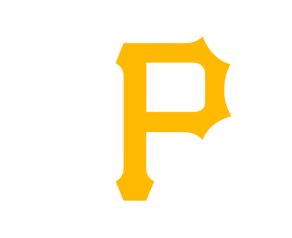

In [1147]:
def plot_logo(batter_id: str, ax: plt.Axes):
    # Construct the URL to fetch player data
    url = f"https://statsapi.mlb.com/api/v1/people?personIds={batter_id}&hydrate=currentTeam"

    # Send a GET request to the URL and parse the JSON response
    data = requests.get(url).json()

    # Construct the URL to fetch team data
    url_team = 'https://statsapi.mlb.com/' + data['people'][0]['currentTeam']['link']

    # Send a GET request to the team URL and parse the JSON response
    data_team = requests.get(url_team).json()

    # Extract the team abbreviation
    team_abb = data_team['teams'][0]['abbreviation']

    # Get the logo URL from the image dictionary using the team abbreviation
    logo_url = image_dict[team_abb]

    # Send a GET request to the logo URL
    response = requests.get(logo_url)

    # Open the image from the response content
    img = Image.open(BytesIO(response.content))

    # Display the image on the axis
    ax.set_xlim(0, 1.3)
    ax.set_ylim(0, 1)
    ax.imshow(img, extent=[0.3, 1.3, 0, 1], origin='upper')

    # Turn off the axis
    ax.axis('off')

# Call the plot_logo function with the pitcher ID and a new axis of size 1x1
plot_logo(batter_id, ax=plt.subplots(figsize=(1, 1))[1])

In [1148]:
#ORIGINAL STATS TABLE

# from matplotlib import font_manager

# fangraphs_stats_dict = {
#     'G': {'table_header': '$\\bf{G}$', 'format': '.0f'},         # Integer
#     'PA': {'table_header': '$\\bf{PA}$', 'format': '.0f'},        # Integer
#     'wOBA': {'table_header': '$\\bf{wOBA}$', 'format': '.3f'},     # Float (3 decimals)
#     'wRC+': {'table_header': '$\\bf{wRC+}$', 'format': '.0f'},     # Integer (rounded)
#     'AVG': {'table_header': '$\\bf{AVG}$', 'format': '.3f'},       # Float (3 decimals)
#     'OBP': {'table_header': '$\\bf{OBP}$', 'format': '.3f'},       # Float (3 decimals)
#     'SLG': {'table_header': '$\\bf{SLG}$', 'format': '.3f'},       # Float (3 decimals)
#     'OPS': {'table_header': '$\\bf{OPS}$', 'format': '.3f'},       # Float (3 decimals)
#     'WAR': {'table_header': '$\\bf{WAR}$', 'format': '.1f'},
#     'ISO': {'table_header': '$\\bf{ISO}$', 'format': '.3f'},
# }

# def fangraphs_batter_stats(batter_id: int, ax: plt.Axes, stats: list, season: int, fontsize: int = 20):
#     df_fangraphs = fangraphs_batting_leaderboards(season=season)

#     df_fangraphs_batter = df_fangraphs[df_fangraphs['xMLBAMID'] == batter_id][stats].reset_index(drop=True)
#     print(df_fangraphs_batter)
        
#     df_fangraphs_batter.loc[0] = [format(df_fangraphs_batter[x][0],fangraphs_stats_dict[x]['format']) for x in df_fangraphs_batter]
    
    
#     table_fg = ax.table(cellText=df_fangraphs_batter.values, colLabels=stats, cellLoc='center',
#                     bbox=[0.00, 0.0, 1, 1])
#     # Create the table
#     table_fg = ax.table(cellText=df_fangraphs_batter.values, colLabels=stats, cellLoc='center', bbox=[0.00, 0.0, 1, 1])

#     # Set font size for each cell's text
#     for key, cell in table_fg.get_celld().items():
#         if cell._text:
#             cell._text.set_fontsize(fontsize)

#     ax.axis('off')

# stats = ['G','PA','AVG','OBP','SLG','OPS','ISO','WAR']
# fangraphs_batter_stats(batter_id = batter_id,
#                         ax = plt.subplots(figsize=(10, 1))[1],
#                         stats = stats,
#                         season = 2024)

       G     PA       AVG       OBP      SLG       OPS       ISO       WAR
0  116.0  458.0  0.218045  0.310722  0.45614  0.766862  0.238095  0.417674


/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/704364099.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_batter.loc[0] = [format(df_fangraphs_batter[x][0], fangraphs_stats_dict[x]['format']) for x in df_fangraphs_batter]
/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/704364099.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '458' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_batter.loc[0] = [format(df_fangraphs_batter[x][0], fangraphs_stats_dict[x]['format']) for x in df_fangraphs_batter]
/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/704364099.py:32: FutureWarning: Setting an item of incompatible

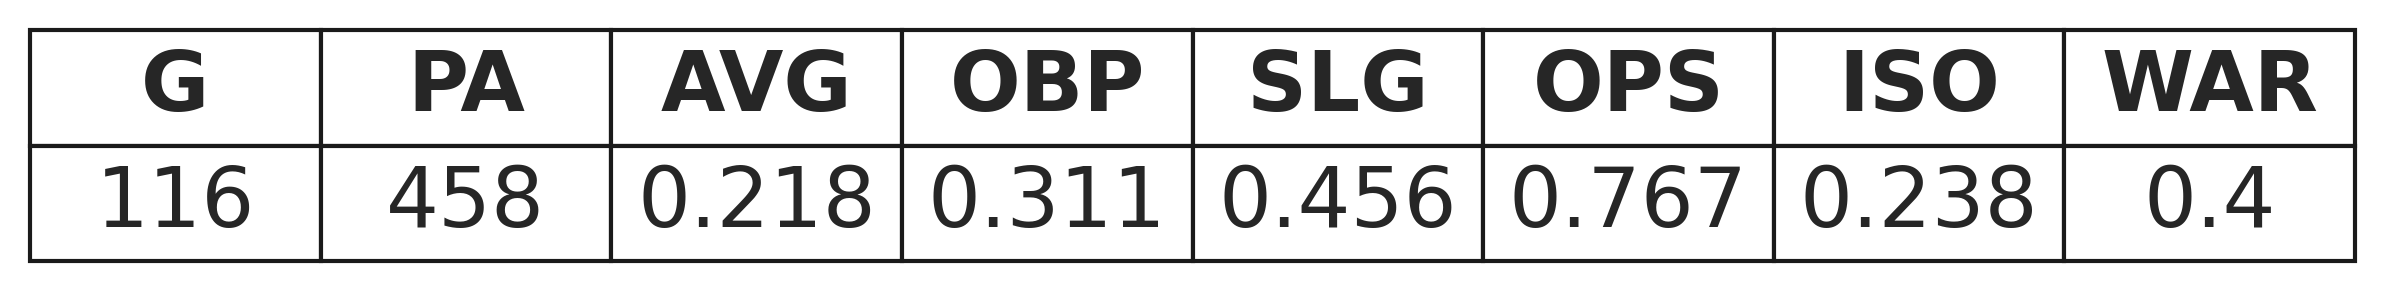

In [1149]:
from matplotlib import font_manager

fangraphs_stats_dict = {
    'G': {'table_header': '$\\bf{G}$', 'format': '.0f'},         # Integer
    'PA': {'table_header': '$\\bf{PA}$', 'format': '.0f'},        # Integer
    'wOBA': {'table_header': '$\\bf{wOBA}$', 'format': '.3f'},     # Float (3 decimals)
    'wRC+': {'table_header': '$\\bf{wRC+}$', 'format': '.0f'},     # Integer (rounded)
    'AVG': {'table_header': '$\\bf{AVG}$', 'format': '.3f'},       # Float (3 decimals)
    'OBP': {'table_header': '$\\bf{OBP}$', 'format': '.3f'},       # Float (3 decimals)
    'SLG': {'table_header': '$\\bf{SLG}$', 'format': '.3f'},       # Float (3 decimals)
    'OPS': {'table_header': '$\\bf{OPS}$', 'format': '.3f'},       # Float (3 decimals)
    'WAR': {'table_header': '$\\bf{WAR}$', 'format': '.1f'},
    'ISO': {'table_header': '$\\bf{ISO}$', 'format': '.3f'},
}

def fangraphs_batter_stats(batter_id: str, ax: plt.Axes, stats: list, season: int, fontsize: int = 20):
    df_fangraphs = fangraphs_batting_leaderboards(season=season)

    # Convert batter_id to integer to match the type of xMLBAMID
    batter_id = int(batter_id)
    
    # Filter data for the given batter ID
    df_fangraphs_batter = df_fangraphs[df_fangraphs['xMLBAMID'] == batter_id][stats].reset_index(drop=True)
    
    # Check if the batter is found
    if df_fangraphs_batter.empty:
        print(f"No data found for batter ID {batter_id}")
    else:
        print(df_fangraphs_batter)
    
        # Format the stats as per the dictionary
        df_fangraphs_batter.loc[0] = [format(df_fangraphs_batter[x][0], fangraphs_stats_dict[x]['format']) for x in df_fangraphs_batter]
    
        # Create the table
        table_fg = ax.table(cellText=df_fangraphs_batter.values, colLabels=stats, cellLoc='center', bbox=[0.00, 0.0, 1, 1])
        
        # Set font size for each cell's text
        for key, cell in table_fg.get_celld().items():
            if cell._text:
                cell._text.set_fontsize(fontsize,)
        for i, key in enumerate(stats):
            table_fg[0, i]._text.set_fontweight('bold')  # Set column header to bold


        ax.axis('off')


# Example call to display stats
batter_id = 669911  # Example batter ID
stats = ['G', 'PA', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'WAR']  # Example stats
season = 2024  # Example season

# Create a subplot for the stats table
fig, ax = plt.subplots(figsize=(10, 1))  # Adjust the size as needed
fangraphs_batter_stats(batter_id=batter_id, ax=ax, stats=stats, season=season)
plt.show()


In [1150]:
# Retrieve the Fangraphs data for inspection
df_fangraphs = fangraphs_batting_leaderboards(season=2024)

# Check the first few rows and column data types
print(df_fangraphs.head())
print(df_fangraphs.dtypes)

  Bats  xMLBAMID                                               Name  \
0    R    592450  <a href="statss.aspx?playerid=15640&position=O...   
1    R    677951  <a href="statss.aspx?playerid=25764&position=S...   
2    L    660271  <a href="statss.aspx?playerid=19755&position=D...   
3    L    665742  <a href="statss.aspx?playerid=20123&position=O...   
4    L    683002  <a href="statss.aspx?playerid=26289&position=3...   

                                                Team  Season   Age     AgeR  \
0  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  32.0  32 - 32   
1  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  24.0  24 - 24   
2  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  29.0  29 - 29   
3  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  25.0  25 - 25   
4  <a href="leaders.aspx?pos=all&stats=bat&lg=all...    2024  23.0  23 - 23   

   SeasonMin  SeasonMax      G  ...     TG    TPA   PlayerNameRoute  \
0       2024       2024  15

In [1151]:
#ORIGINAL HEATMAP VS R

# import matplotlib.patches as patches
# def heatmap_R(df_pyb: pd.DataFrame):
#     # Filter the DataFrame for right-handed pitchers and relevant columns
#     filtered_R_df = df_pyb[
#         (df_pyb['plate_x'].notnull()) & 
#         (df_pyb['plate_z'].notnull()) & 
#         (df_pyb['woba_value'].notnull()) & 
#         (df_pyb['p_throws'] == 'R')
#     ]

#     # Create a DataFrame for the heatmap
#     plate_damage_df = pd.DataFrame({
#         'plate_x': filtered_R_df['plate_x'],
#         'plate_z': filtered_R_df['plate_z'],
#         'damage': filtered_R_df['woba_value']
#     })

#     # Define the corner coordinates for the rectangle
#     min_plate_x = -0.83
#     max_plate_x = 0.83
#     min_plate_z = 1.17
#     max_plate_z = 3.92

#     # Create the heatmap
#     plt.figure(figsize=(5, 3.5))

#     # KDE plot with plate_x and plate_z as the axes, and damage as the color
#     sns.kdeplot(data=plate_damage_df, x='plate_x', y='plate_z', cmap='Spectral_r', fill=True, cbar=False, bw_adjust=0.9)

#     # Create a rectangle using the given corner coordinates
#     rectangle = patches.Rectangle(
#         (min_plate_x, min_plate_z),  # Lower left corner
#         max_plate_x - min_plate_x,   # Width
#         max_plate_z - min_plate_z,   # Height
#         linewidth=2,                 # Line width
#         edgecolor='black',           # Rectangle border color
#         facecolor='none',            # No fill color inside the rectangle
#         linestyle='-'                # Solid line style
#     )

#     # Add the rectangle to the plot
#     plt.gca().add_patch(rectangle)

#     # Set plot limits and aesthetics
#     plt.xlim(-2.5, 2.5)
#     plt.ylim(0, 5)
#     plt.xticks([])  # Remove x-axis numbers
#     plt.yticks([])  # Remove y-axis numbers
#     plt.grid(False)
#     sns.set(style="white")

#     # Add labels and title
#     plt.title("wOBA Damage vs R")
#     plt.xlabel("")
#     plt.ylabel("")

#     # Show the plot
#     plt.show()

#     # Return the filtered DataFrame for further use
#     return filtered_R_df
# heatmap_df = heatmap_R(df_pyb)


In [1152]:
import matplotlib.patches as patches

def heatmap_R(df_pyb: pd.DataFrame, ax: plt.Axes):  # Add ax parameter here
    # Filter the DataFrame for left-handed pitchers and relevant columns
    filtered_R_df = df_pyb[
        (df_pyb['plate_x'].notnull()) & 
        (df_pyb['plate_z'].notnull()) & 
        (df_pyb['woba_value'].notnull()) & 
        (df_pyb['p_throws'] == 'R')
    ]

    # Create a DataFrame for the heatmap
    plate_damage_df = pd.DataFrame({
        'plate_x': filtered_R_df['plate_x'],
        'plate_z': filtered_R_df['plate_z'],
        'damage': filtered_R_df['woba_value']
    })

    # Define the corner coordinates for the rectangle
    min_plate_x = -0.83
    max_plate_x = 0.83
    min_plate_z = 1.17
    max_plate_z = 3.92

    # Create the heatmap on the provided axis
    sns.kdeplot(data=plate_damage_df, x='plate_x', y='plate_z', cmap='Spectral_r', fill=True, cbar=False, bw_adjust=0.9, ax=ax)

    # Create a rectangle using the given corner coordinates
    rectangle = patches.Rectangle(
        (min_plate_x, min_plate_z),  # Lower left corner
        max_plate_x - min_plate_x,   # Width
        max_plate_z - min_plate_z,   # Height
        linewidth=2,                 # Line width
        edgecolor='black',           # Rectangle border color
        facecolor='none',            # No fill color inside the rectangle
        linestyle='-'                # Solid line style
    )

    # Add the rectangle to the plot
    ax.add_patch(rectangle)

    # Set plot limits and aesthetics
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(0, 5)
    ax.set_xticks([])  # Remove x-axis numbers
    ax.set_yticks([])  # Remove y-axis numbers
    ax.grid(False)
    sns.set(style="white")

    # Add labels and title
    ax.set_title("wOBA Damage vs R", fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")

    return filtered_R_df


In [1153]:
#ORIGINAL HEATMAP VS L

# import matplotlib.patches as patches

# def heatmap_L(df_pyb: pd.DataFrame):
#     # Filter the DataFrame for left-handed pitchers and relevant columns
#     filtered_L_df = df_pyb[
#         (df_pyb['plate_x'].notnull()) & 
#         (df_pyb['plate_z'].notnull()) & 
#         (df_pyb['woba_value'].notnull()) & 
#         (df_pyb['p_throws'] == 'L')
#     ]

#     # Create a DataFrame for the heatmap
#     plate_damage_df = pd.DataFrame({
#         'plate_x': filtered_L_df['plate_x'],
#         'plate_z': filtered_L_df['plate_z'],
#         'damage': filtered_L_df['woba_value']
#     })

#     # Define the corner coordinates for the rectangle
#     min_plate_x = -0.83
#     max_plate_x = 0.83
#     min_plate_z = 1.17
#     max_plate_z = 3.92

#     # Create the heatmap
#     plt.figure(figsize=(5, 3.5))

#     # KDE plot with plate_x and plate_z as the axes, and damage as the color
#     sns.kdeplot(data=plate_damage_df, x='plate_x', y='plate_z', cmap='Spectral_r', fill=True, cbar=False, bw_adjust=0.9)

#     # Create a rectangle using the given corner coordinates
#     rectangle = patches.Rectangle(
#         (min_plate_x, min_plate_z),  # Lower left corner
#         max_plate_x - min_plate_x,   # Width
#         max_plate_z - min_plate_z,   # Height
#         linewidth=2,                 # Line width
#         edgecolor='black',           # Rectangle border color
#         facecolor='none',            # No fill color inside the rectangle
#         linestyle='-'                # Solid line style
#     )

#     # Add the rectangle to the plot
#     plt.gca().add_patch(rectangle)

#     # Set plot limits and aesthetics
#     plt.xlim(-2.5, 2.5)
#     plt.ylim(0, 5)
#     plt.xticks([])  # Remove x-axis numbers
#     plt.yticks([])  # Remove y-axis numbers
#     plt.grid(False)
#     sns.set(style="white")

#     # Add labels and title
#     plt.title("wOBA Damage vs L")
#     plt.xlabel("")
#     plt.ylabel("")

#     # Show the plot
#     plt.show()

#     # Return the filtered DataFrame for further use
#     return filtered_L_df

# heatmap_df_L = heatmap_L(df_pyb)


In [1154]:
import matplotlib.patches as patches

def heatmap_L(df_pyb: pd.DataFrame, ax: plt.Axes):  # Add ax parameter here
    # Filter the DataFrame for left-handed pitchers and relevant columns
    filtered_L_df = df_pyb[
        (df_pyb['plate_x'].notnull()) & 
        (df_pyb['plate_z'].notnull()) & 
        (df_pyb['woba_value'].notnull()) & 
        (df_pyb['p_throws'] == 'L')
    ]

    # Create a DataFrame for the heatmap
    plate_damage_df = pd.DataFrame({
        'plate_x': filtered_L_df['plate_x'],
        'plate_z': filtered_L_df['plate_z'],
        'damage': filtered_L_df['woba_value']
    })

    # Define the corner coordinates for the rectangle
    min_plate_x = -0.83
    max_plate_x = 0.83
    min_plate_z = 1.17
    max_plate_z = 3.92

    # Create the heatmap on the provided axis
    sns.kdeplot(data=plate_damage_df, x='plate_x', y='plate_z', cmap='Spectral_r', fill=True, cbar=False, bw_adjust=0.9, ax=ax)

    # Create a rectangle using the given corner coordinates
    rectangle = patches.Rectangle(
        (min_plate_x, min_plate_z),  # Lower left corner
        max_plate_x - min_plate_x,   # Width
        max_plate_z - min_plate_z,   # Height
        linewidth=2,                 # Line width
        edgecolor='black',           # Rectangle border color
        facecolor='none',            # No fill color inside the rectangle
        linestyle='-'                # Solid line style
    )

    # Add the rectangle to the plot
    ax.add_patch(rectangle)

    # Set plot limits and aesthetics
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(0, 5)
    ax.set_xticks([])  # Remove x-axis numbers
    ax.set_yticks([])  # Remove y-axis numbers
    ax.grid(False)
    sns.set(style="white")

    # Add labels and title
    ax.set_title("wOBA Damage vs L", fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")

    return filtered_L_df


/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/3531681602.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('coolwarm')  # Use a diverging colormap


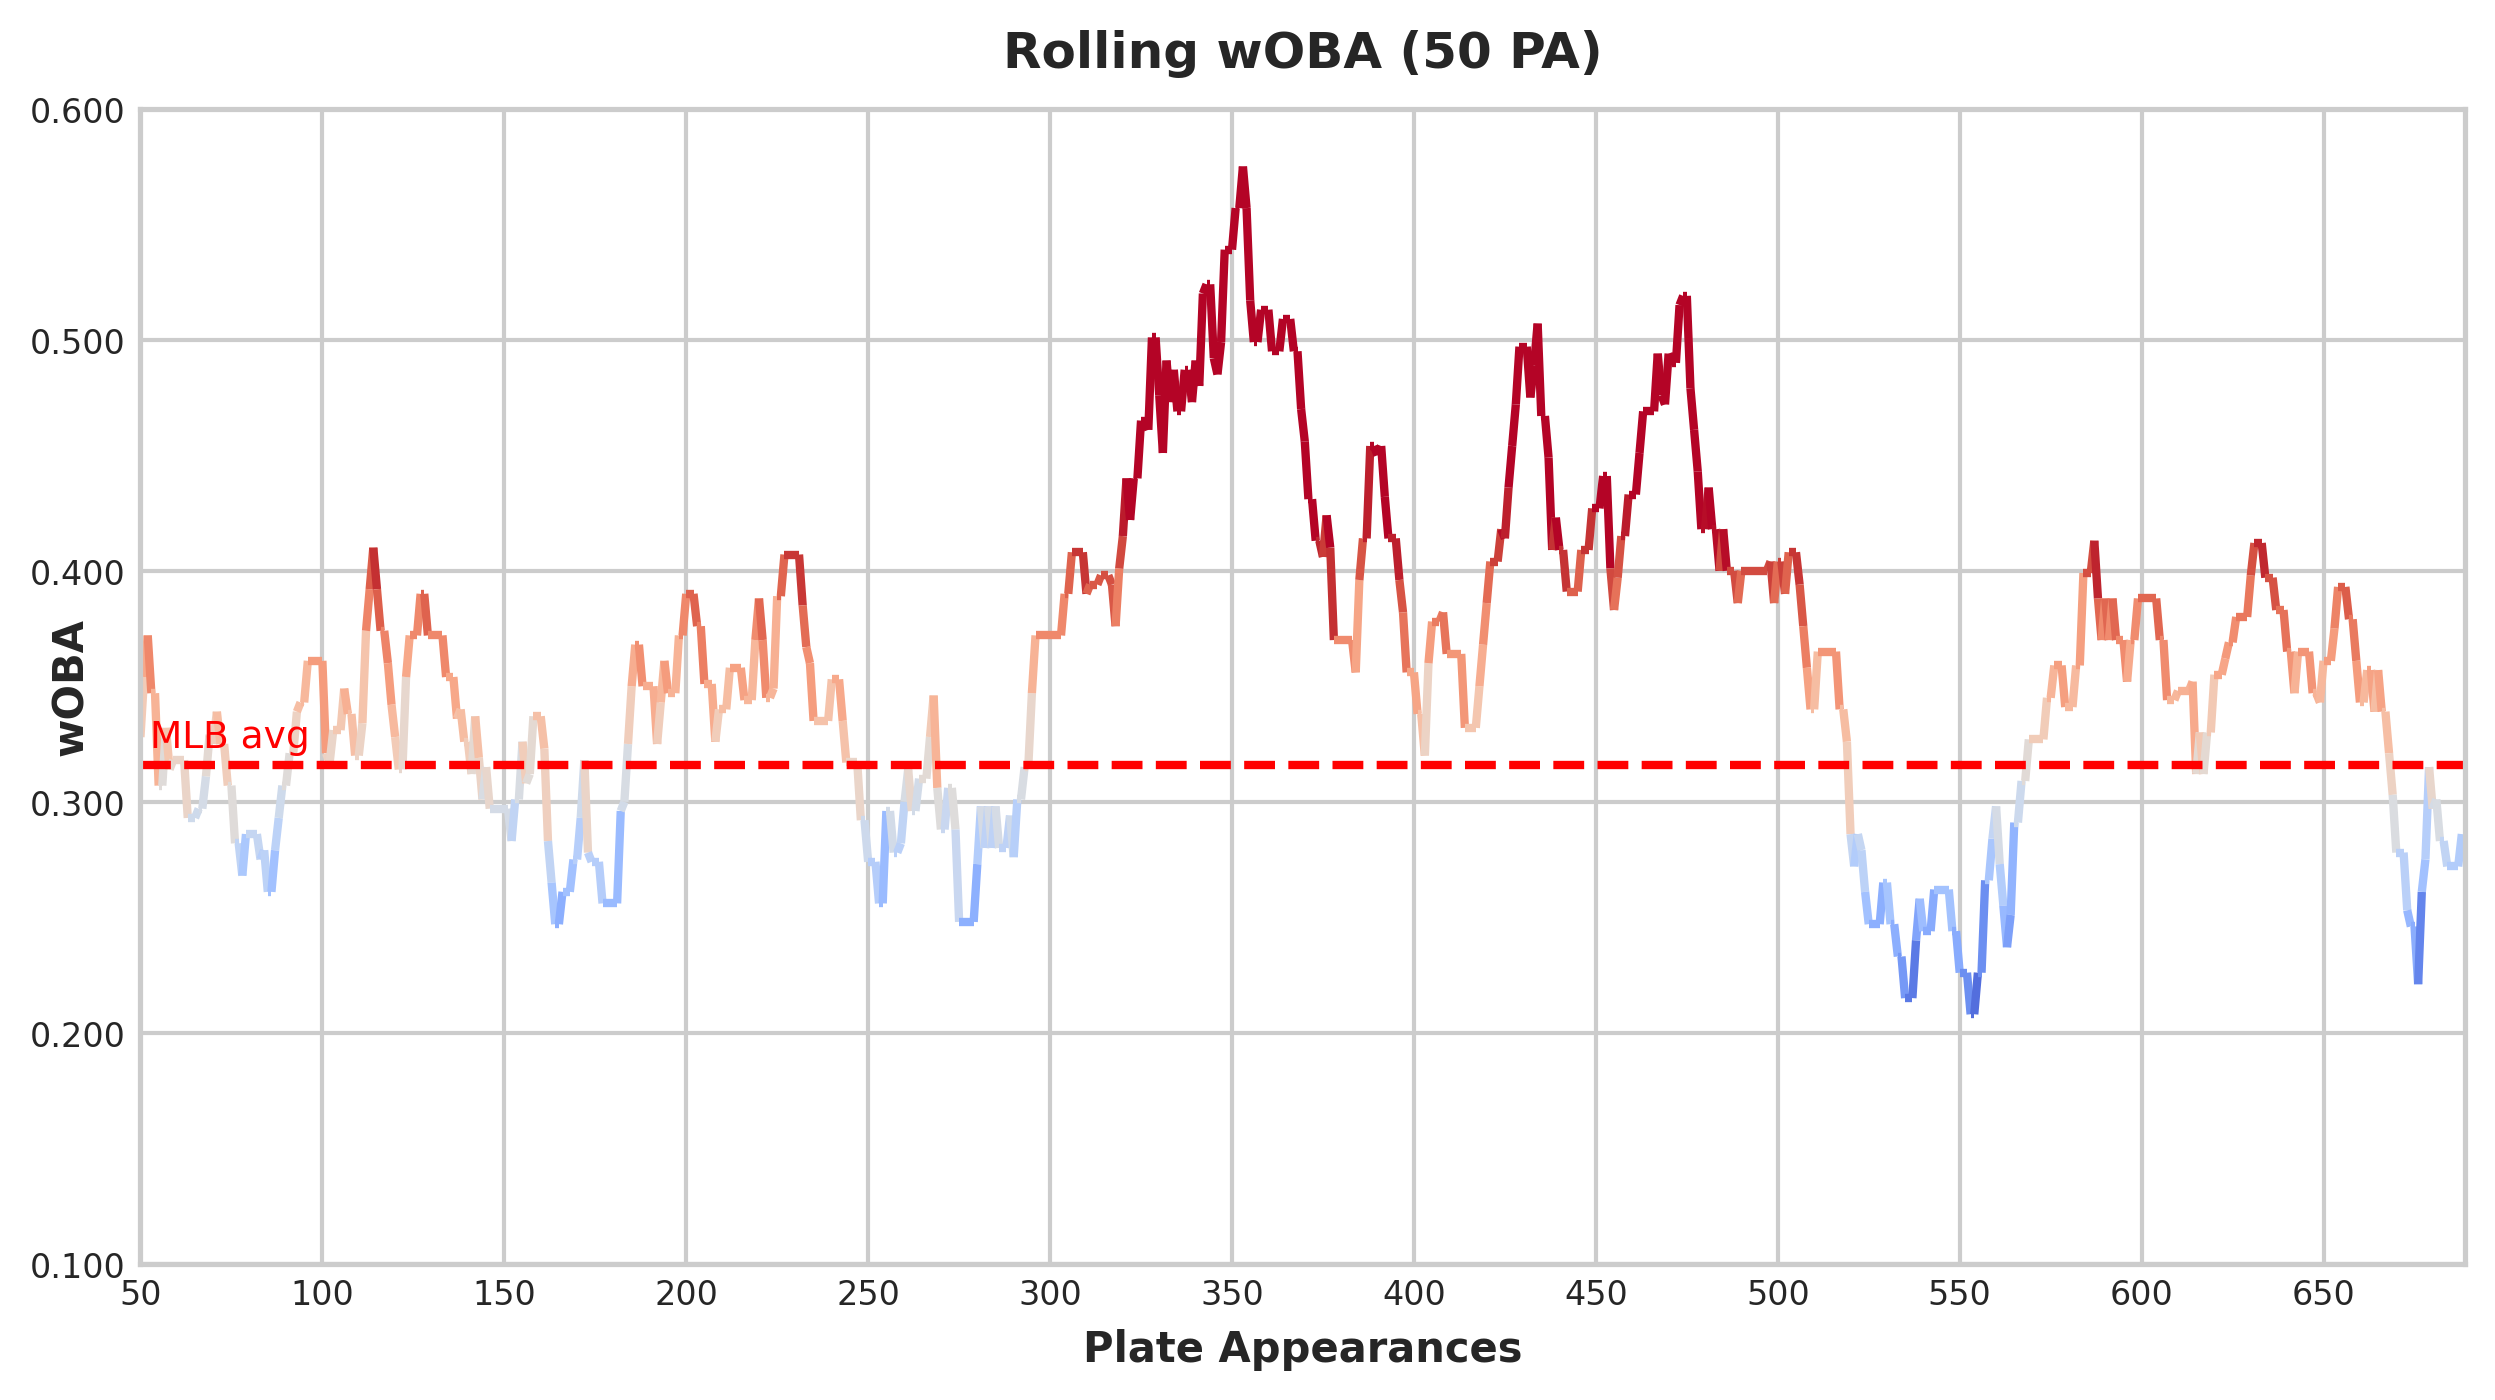

In [1155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter
from matplotlib.collections import LineCollection

def rolling_woba_by_pa(df: pd.DataFrame, ax: plt.Axes, window: int):
    # Drop rows where 'woba_value' or 'plate_x' and 'plate_z' are NaN
    df = df.dropna(subset=['woba_value', 'plate_x', 'plate_z'])

    # Reverse the DataFrame order
    df = df.iloc[::-1].reset_index(drop=True)
    
    # Calculate wOBA rolling window by PA (plate appearance)
    df['rolling_woba'] = df['woba_value'].rolling(window=window).mean()
    
    # Generate x and y data for the plot
    x = np.arange(len(df))
    y = df['rolling_woba'].values

    # Create segments for the LineCollection
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Define color based on the y value crossing the 0.316 threshold
    colors = ['blue' if y_ < 0.316 else 'red' for y_ in y]
    cmap = plt.cm.get_cmap('coolwarm')  # Use a diverging colormap
    lc = LineCollection(
        segments, 
        cmap=cmap, 
        norm=plt.Normalize(vmin=0.19, vmax=0.42),  # Adjust normalization as needed
        linewidth=2
    )
    lc.set_array(y)  # Color by y-values
    ax.add_collection(lc)

    # Plot the rolling wOBA against Plate Appearances
    ax.plot(x, y, alpha=0)  # Transparent line for proper scaling
    
    # Adjust axis labels and title with smaller fonts and closer to graph
    ax.set_xlabel('Plate Appearances', fontdict={'size': 10}, fontweight='bold')  # Smaller x-axis label font size
    ax.set_ylabel('wOBA', fontdict={'size': 10}, labelpad=-15, fontweight='bold')  # Smaller y-axis label font size and closer to the axis
    ax.set_title(f'Rolling wOBA ({window} PA)', fontdict={'size': 12}, pad=10,fontweight='bold')  # Smaller title font size and adjusted padding

    # Format y-axis to show three decimal places
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    
    # Set x-axis to show integer values only (i.e., PA numbers)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Set font size for tick labels
    ax.tick_params(axis='both', which='major', labelsize=8, labelleft=True, labelbottom=True)  # Smaller font size for tick labels
    
    # Set the tick labels inside the graph
    ax.tick_params(axis='x', direction='in', length=6)  # Move x-axis ticks inside
    ax.tick_params(axis='y', direction='in', length=6)  # Move y-axis ticks inside

    ax.set_xticks(np.arange(0, len(df), 50))

    # Optional: Adjust x and y axis limits
    ax.set_xlim(50, len(df))  # Set x-axis range from 0 to the length of the data
    ax.set_ylim(.1, 0.600)      # Example: limit y-axis to range from 0 to 0.5 for rolling wOBA
    
    # Add dashed red line at y = 0.316 (MLB average)
    ax.axhline(y=0.316, color='red', linestyle='--', linewidth=2)
    
    
    xlim_right = ax.get_xlim()[1]

    # Add label for the dashed line on the right side of the graph
    ax.text(xlim_right * 0.14, 0.328, 'MLB avg', color='red', fontsize=9, va='center', ha='right')

    plt.show()

filtered_df = df_pyb[(df_pyb['events'].notnull())]
# Example usage
rolling_woba_by_pa(filtered_df, ax=plt.subplots(figsize=(10, 5))[1], window=50)


Gathering Player Data
       G     PA       AVG       OBP       SLG       OPS      ISO       WAR
0  157.0  713.0  0.288194  0.419355  0.569444  0.988799  0.28125  8.140359


/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/704364099.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '157' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_batter.loc[0] = [format(df_fangraphs_batter[x][0], fangraphs_stats_dict[x]['format']) for x in df_fangraphs_batter]
/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/704364099.py:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '713' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_fangraphs_batter.loc[0] = [format(df_fangraphs_batter[x][0], fangraphs_stats_dict[x]['format']) for x in df_fangraphs_batter]
/var/folders/pn/s56mk9md5zzd_jwqqhtnf7fr0000gn/T/ipykernel_76552/704364099.py:32: FutureWarning: Setting an item of incompatible

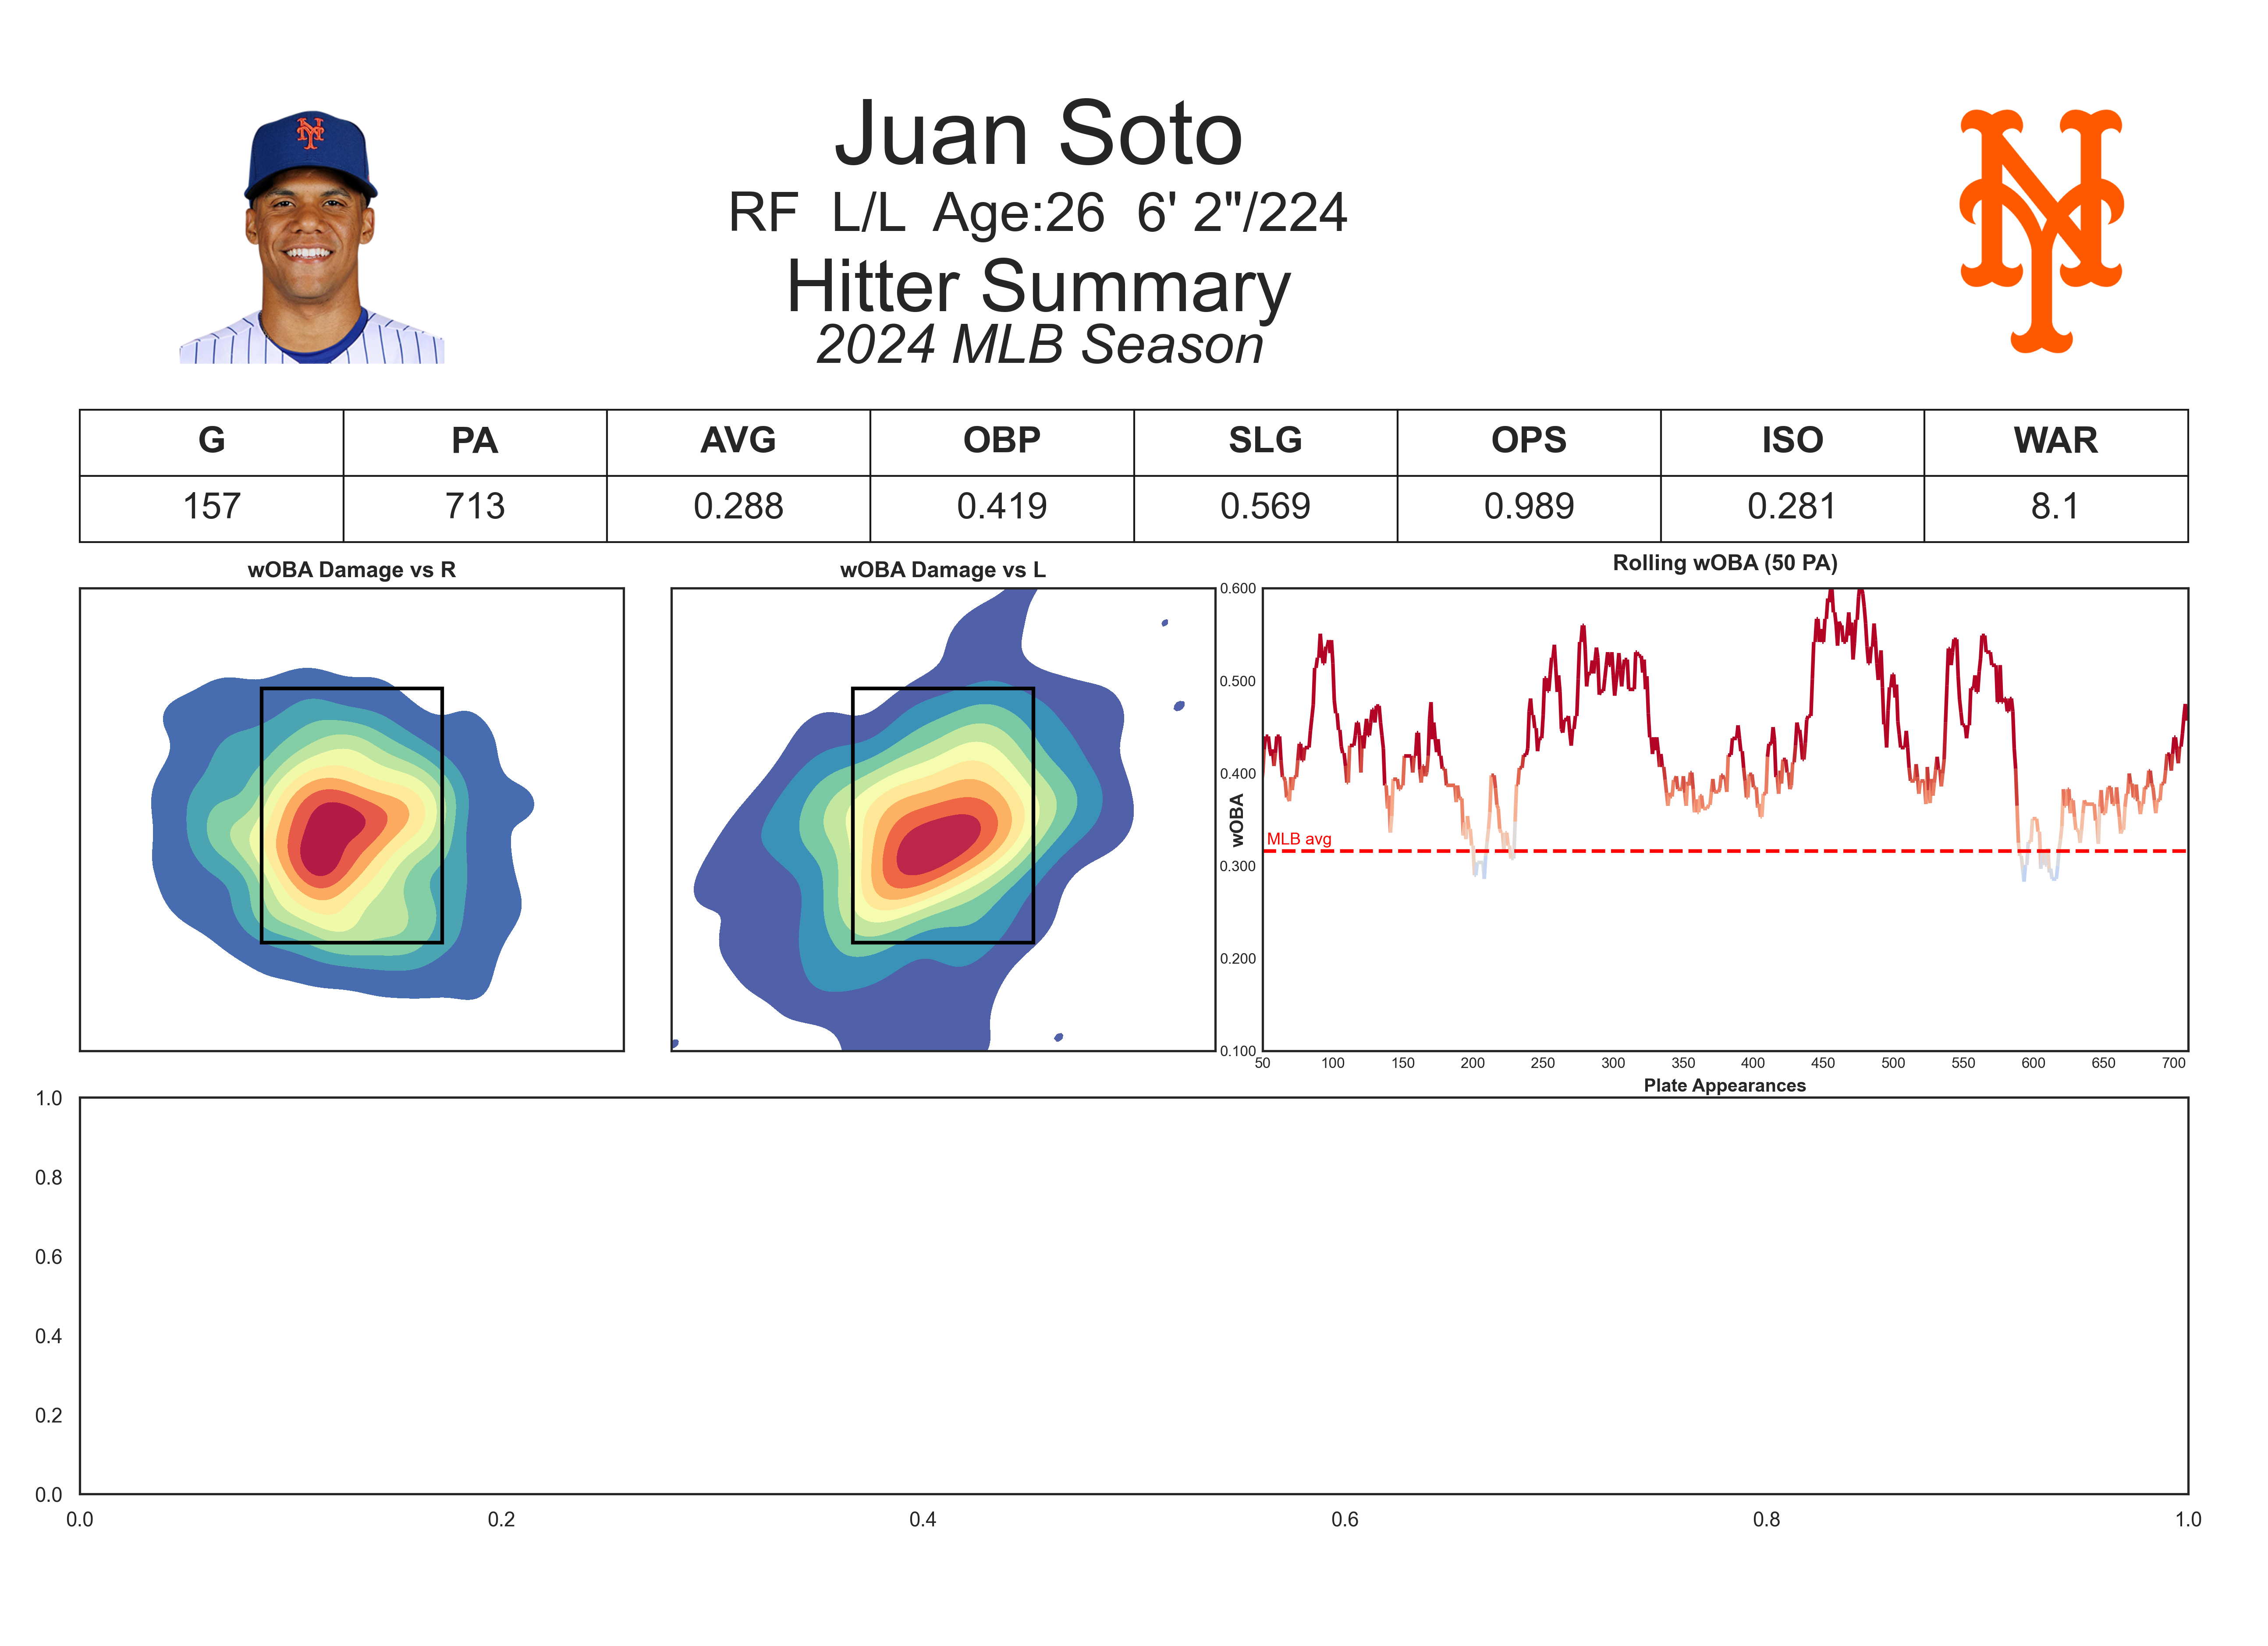

<Figure size 1920x1440 with 0 Axes>

In [1158]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.patches as patches
import numpy as np
import pandas as pd

def hitting_dashboard(batter_id: str, df: pd.DataFrame, stats: list, window: int):
    # Process the DataFrame and initialize the figure
    df = df_processing(df)  # Ensure data processing
    fig = plt.figure(figsize=(22, 16))

    # Define gridspec for the layout
    gs = gridspec.GridSpec(6, 8,
                        height_ratios=[3, 20, 10, 35, 30, 7],  # Increased height for rolling wOBA plot (row 3)
                        width_ratios=[1, 13, 13, 13, 13, 23, 23, 1])

    # Define subplots
    ax_headshot = fig.add_subplot(gs[1, 1:3])
    ax_bio = fig.add_subplot(gs[1, 2:6])
    ax_logo = fig.add_subplot(gs[1, 6:8])
    
    ax_season_table = fig.add_subplot(gs[2, 1:7])

    ax_plot_1 = fig.add_subplot(gs[3, 1:3])
    ax_plot_2 = fig.add_subplot(gs[3, 3:5])
    ax_plot_3 = fig.add_subplot(gs[3, 5:7])

    ax_table = fig.add_subplot(gs[4, 1:7])

    ax_footer = fig.add_subplot(gs[-1, 1:7])
    ax_header = fig.add_subplot(gs[0, 1:7])
    ax_left = fig.add_subplot(gs[:, 0])
    ax_right = fig.add_subplot(gs[:, -1])

    # Hide axes for footer, header, left, and right
    ax_footer.axis('off')
    ax_header.axis('off')
    ax_left.axis('off')
    ax_right.axis('off')

    # Load and display player visuals
    player_headshot(batter_id, ax=ax_headshot)
    player_bio(batter_id, ax=ax_bio)
    plot_logo(batter_id, ax=ax_logo)

    # Display Season Stats Table
    fangraphs_batter_stats(batter_id, ax=ax_season_table, stats=stats, season=season)

    # Plot the heatmaps for right-handed and left-handed pitchers
    heatmap_R(df, ax=ax_plot_1)
    heatmap_L(df, ax=ax_plot_2)
    rolling_woba_by_pa(df, ax=ax_plot_3, window=window)

    ax_plot_1.set_aspect('auto')
    ax_plot_2.set_aspect('auto')

    # Display Footer and Header (can be used for additional info)
    fig.text(0.02, 0.02, 'By: @JLukeSports', ha='left', va='bottom', fontsize=24)
    fig.text(0.5, 0.02, 'Colour Coding Compares to League Average', ha='center', va='top', fontsize=16)
    fig.text(0.98, 0.02, 'Data: MLB, Fangraphs\nImages: MLB, ESPN', ha='right', va='top', fontsize=24)
    

     # Adjust layout to avoid clipping
    fig.tight_layout(pad=4.0)  # Add more padding between subplots

    # Adjust title and label spacing to ensure no clipping
    ax_plot_3.set_title(f'Rolling wOBA ({window} PA)', fontsize=16, pad=30)  # Title padding
    ax_plot_3.set_ylabel('wOBA', fontsize=14, labelpad=20)  # Y-axis label padding

    fig.subplots_adjust(hspace=1.0, wspace=1, bottom=0.1) 

    # Show the final dashboard
    plt.tight_layout()
    plt.show()

# Define your batter_id, dataframe (df_pyb), and stats list
batter_id = "665742"  # Example batter ID
df_pyb = pyb.statcast_batter('2024-03-28', '2024-10-01', batter_id) # Your dataset
stats = ['G', 'PA', 'AVG', 'OBP', 'SLG', 'OPS', 'ISO', 'WAR']  # Example stats you want to display
window = 50  # Example window size for rolling wOBA

# Call the dashboard function
hitting_dashboard(batter_id=batter_id, df=df_pyb, stats=stats, window=window)


In [1157]:
print(pyb.playerid_lookup('Soto','Juan'))

  name_last name_first  key_mlbam key_retro key_bbref  key_fangraphs  \
0      soto       juan     665742  sotoj001  sotoju01          20123   

   mlb_played_first  mlb_played_last  
0            2018.0           2024.0  
